# Učitavanje datoteka

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
download_url = "https://drive.google.com/uc?id=1qXq6k2rNR_dgG9XA4uMjAeuzUYkGx7HZ"

In [ ]:
df = pd.read_csv(download_url)
df.job_functions = df.job_functions.apply(eval)
df.industries = df.industries.apply(eval)

df.head()

,job_title,seniority_level,employment_type,industries,job_functions
0,Manual Tester,Entry level,Full-time,[Information Technology and Services],"[Engineering, Information Technology]"
1,Field Marketing Representative,Entry level,Full-time,"[Food & Beverages, Wholesale, Retail]","[Marketing, Sales]"
2,Consumer Relations Representative,Associate,Full-time,"[Marketing and Advertising, Food & Beverages, ...",[Other]
3,Software Engineer In Test,Mid-Senior level,Full-time,"[Information Technology and Services, Computer...","[Information Technology, Quality Assurance]"
4,Electrician,Entry level,Full-time,"[Electrical/Electronic Manufacturing, Construc...","[Management, Manufacturing]"


In [ ]:
download_url = "https://drive.google.com/uc?id=1emt0cqUyMlGr6sJzUIWR9omqBJbODMkU"
test = pd.read_csv(download_url)
test.job_functions = test.job_functions.apply(eval)
test.industries = test.industries.apply(eval)

test.head()

,job_title,seniority_level,employment_type,industries,job_functions
0,"CAD Drafter - Dallas, TX",Not Applicable,Full-time,"[Construction, Civil Engineering, Real Estate]","[Design, Art/Creative, Information Technology]"
1,COMPUTER ANALYST NOC-2171,Entry level,Full-time,"[Information Technology and Services, Computer...",[Information Technology]
2,Videographer,Entry level,Full-time,"[Marketing and Advertising, Internet, Financia...","[Design, Art/Creative, Information Technology]"
3,Sales Representative,Entry level,Full-time,"[Building Materials, Machinery, Mechanical or ...","[Sales, Business Development]"
4,Open job positions for all employees,Entry level,Full-time,"[Electrical/Electronic Manufacturing, Construc...",[Other]


In [ ]:
df.tail(10)

,job_title,seniority_level,employment_type,industries,job_functions
99990,Floor Supervisor,Mid-Senior level,Full-time,"[Marketing and Advertising, Consumer Goods, Re...","[Sales, Business Development]"
99991,"Housemanager, Personal Assistant",Entry level,Full-time,"[Staffing and Recruiting, Real Estate, Hospita...",[Administrative]
99992,Account Administrator,Not Applicable,Full-time,"[Events Services, Hospitality, Leisure, Travel...","[Customer Service, Information Technology]"
99993,General Surgery Physician,Associate,Full-time,[Hospital & Health Care],[Health Care Provider]
99994,Packer 1st shift -Tarrant County,Entry level,Full-time,"[Machinery, Mining & Metals, Staffing and Recr...","[Management, Manufacturing]"
99995,Roof Loader Striker,Entry level,Full-time,"[Construction, Building Materials, Retail]",[Other]
99996,Quality Assurance Representative,Not Applicable,Full-time,[Internet],[Quality Assurance]
99997,Paratransit (shuttle) Bus Driver,Entry level,Full-time,"[Nonprofit Organization Management, Government...",[Other]
99998,Apprenticeship trained Patternmaker,Internship,Full-time,"[Automotive, Mechanical or Industrial Engineer...","[Design, Art/Creative, Information Technology]"
99999,Bridge Inspectors,Entry level,Full-time,"[Construction, Civil Engineering, Environmenta...","[Engineering, Information Technology]"


In [ ]:
np.random.seed(69)

In [ ]:
rnd_idxs = np.random.randint(0, 99999, 10)

In [ ]:
df.iloc[rnd_idxs]

,job_title,seniority_level,employment_type,industries,job_functions
64566,Admissions Nurse Liaison,Mid-Senior level,Full-time,[Hospital & Health Care],[Health Care Provider]
69577,Warehouse Bagger (Part-Time),Entry level,Part-time,"[Construction, Wholesale, Retail]",[Other]
9818,Bedding Salesperson,Entry level,Temporary,"[Wholesale, Consumer Goods, Retail]","[Sales, Business Development]"
25015,"Contract, Rates & Commodity Manager",Associate,Contract,"[Construction, Automotive, Transportation/Truc...","[Purchasing, Supply Chain]"
47508,Primary Care Provider,Mid-Senior level,Full-time,"[Information Technology and Services, Computer...",[Other]
11825,Senior Clinical Trial Manager,Executive,Full-time,"[Pharmaceuticals, Biotechnology, Hospital & He...","[Project Management, Research, Management]"
37142,Custodial Worker II,Entry level,Full-time,"[Nonprofit Organization Management, Government...",[Administrative]
74761,"Library Page (LEAP), Temporary",Entry level,Part-time,"[Construction, Environmental Services, Governm...","[Education, Training]"
79032,Repair Technician,Entry level,Full-time,"[Construction, Building Materials, Transportat...","[Engineering, Information Technology]"
48353,LABORER,Entry level,Part-time,"[Nonprofit Organization Management, Staffing a...",[Other]


In [ ]:
df.dtypes

job_title          object
seniority_level    object
employment_type    object
industries         object
job_functions      object
dtype: object

In [ ]:
#No. of non-null/nan values for each column/feature
df.shape[0] - df.isna().sum()

job_title          100000
seniority_level    100000
employment_type    100000
industries         100000
job_functions      100000
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   job_title        100000 non-null  object
 1   seniority_level  100000 non-null  object
 2   employment_type  100000 non-null  object
 3   industries       100000 non-null  object
 4   job_functions    100000 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [ ]:
df_subset = df[["job_title", "seniority_level", "employment_type"]]

In [ ]:
print(df_subset.shape)
df_subset.head()

(100000, 3)


,job_title,seniority_level,employment_type
0,Manual Tester,Entry level,Full-time
1,Field Marketing Representative,Entry level,Full-time
2,Consumer Relations Representative,Associate,Full-time
3,Software Engineer In Test,Mid-Senior level,Full-time
4,Electrician,Entry level,Full-time


In [ ]:
df_subset.drop_duplicates(inplace=True, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df_subset.shape

(78348, 3)

In [ ]:
df_subset.head()

,job_title,seniority_level,employment_type
0,Manual Tester,Entry level,Full-time
1,Field Marketing Representative,Entry level,Full-time
2,Consumer Relations Representative,Associate,Full-time
3,Software Engineer In Test,Mid-Senior level,Full-time
4,Electrician,Entry level,Full-time


In [ ]:
df_subset.tail()

,job_title,seniority_level,employment_type
78343,Roof Loader Striker,Entry level,Full-time
78344,Quality Assurance Representative,Not Applicable,Full-time
78345,Paratransit (shuttle) Bus Driver,Entry level,Full-time
78346,Apprenticeship trained Patternmaker,Internship,Full-time
78347,Bridge Inspectors,Entry level,Full-time


In [ ]:
job_tit = df_subset[["job_title"]] #Independent variable
sen_lvl = df_subset[["seniority_level"]] #Dependent variable
emp_typ = df_subset[["employment_type"]] #Dependent variable

In [ ]:
job_tit.head()

,job_title
0,Manual Tester
1,Field Marketing Representative
2,Consumer Relations Representative
3,Software Engineer In Test
4,Electrician


In [ ]:
job_tit.shape

(78348, 1)

In [ ]:
sen_lvl.head()

,seniority_level
0,Entry level
1,Entry level
2,Associate
3,Mid-Senior level
4,Entry level


In [ ]:
sen_lvl.shape

(78348, 1)

In [ ]:
emp_typ.head()

,employment_type
0,Full-time
1,Full-time
2,Full-time
3,Full-time
4,Full-time


In [ ]:
emp_typ.shape

(78348, 1)

In [ ]:
job_tit.value_counts()

job_title                                                          
Graphic Designer                                                       10
Machine Operator                                                        9
Bookkeeper                                                              9
Registered Nurse                                                        8
Controller                                                              8
                                                                       ..
Export Specialist - Customer Sales & Service Representative (m/f/d)     1
Export Specialist II                                                    1
Export Specialist, Global Trade Compliance                              1
Export coördinator                                                      1
﻿Chinese﻿ Medicine Practitioner/Acupuncturist                           1
Length: 71006, dtype: int64

In [ ]:
job_tit.value_counts().shape

(71006,)

In [ ]:
sen_lvl["seniority_level"].unique()

array(['Entry level', 'Associate', 'Mid-Senior level', 'Director',
       'Internship', 'Not Applicable', 'Executive'], dtype=object)

In [ ]:
sen_lvl["seniority_level"].value_counts()

Entry level         35188
Associate           18527
Mid-Senior level    10308
Not Applicable       8885
Director             3333
Internship           1152
Executive             955
Name: seniority_level, dtype: int64

In [ ]:
len(sen_lvl.value_counts())

7

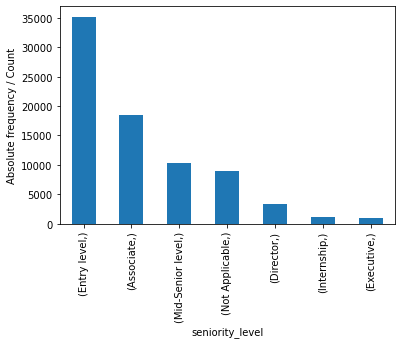

In [ ]:
sen_lvl.value_counts().plot.bar()
plt.ylabel("Absolute frequency / Count");

In [ ]:
emp_typ["employment_type"].unique()

array(['Full-time', 'Part-time', 'Contract', 'Volunteer', 'Internship',
       'Temporary', 'Other'], dtype=object)

In [ ]:
emp_typ.value_counts()

employment_type
Full-time          66469
Part-time           5725
Contract            2903
Temporary           1916
Internship           765
Volunteer            334
Other                236
dtype: int64

In [ ]:
len(emp_typ.value_counts())

7

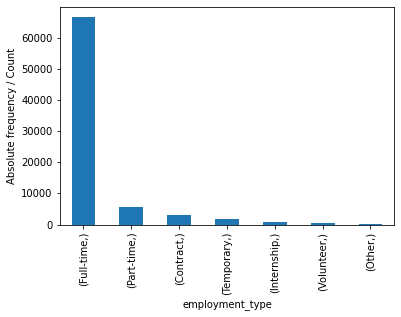

In [ ]:
emp_typ.value_counts().plot.bar()
plt.ylabel("Absolute frequency / Count");

In [ ]:
sen_lvl.replace(sen_lvl["seniority_level"].unique(), [*range(len(sen_lvl["seniority_level"].unique()))], inplace=True)
emp_typ.replace(emp_typ["employment_type"].unique(), [*range(len(emp_typ["employment_type"].unique()))], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
sen_lvl.head()

,seniority_level
0,0
1,0
2,1
3,2
4,0


In [ ]:
emp_typ.head()

,employment_type
0,0
1,0
2,0
3,0
4,0


In [ ]:
job_tit[["job_title"]].head()

,job_title
0,Manual Tester
1,Field Marketing Representative
2,Consumer Relations Representative
3,Software Engineer In Test
4,Electrician


In [ ]:
X = job_tit["job_title"].apply(str.lower).to_frame()
X.head()

,job_title
0,manual tester
1,field marketing representative
2,consumer relations representative
3,software engineer in test
4,electrician


In [ ]:
def remove_punctuations(doc):
  for c in string.punctuation:
    doc = doc.replace(c, "")
  return doc

In [ ]:
X = X["job_title"].apply(remove_punctuations).to_frame()
X.head()

,job_title
0,manual tester
1,field marketing representative
2,consumer relations representative
3,software engineer in test
4,electrician


In [ ]:
word_count = X["job_title"].apply(lambda x: len(x.split())).sort_values(ascending=False)[:20]
word_count

75021    23
23170    23
75523    23
27999    22
38749    22
17220    22
20775    21
77077    21
7202     20
17510    20
45201    20
11714    20
53976    19
18879    19
58512    19
1926     19
17586    19
27930    19
45991    19
44523    19
Name: job_title, dtype: int64

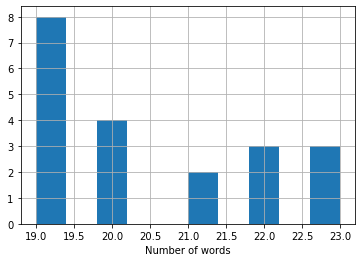

In [ ]:
word_count.hist();
plt.xlabel("Number of words");

In [ ]:
word_count.quantile(.5)

20.0

In [ ]:
X["job_title"].values

array(['manual tester', 'field marketing representative',
       'consumer relations representative', ...,
       'paratransit shuttle bus driver',
       'apprenticeship trained patternmaker', 'bridge inspectors'],
      dtype=object)

In [ ]:
all_tokens = {token for document in X["job_title"].tolist() for token in document.split()}
print(len(all_tokens))

26905


In [ ]:
MAX_NB_WORDS = 10000
MAX_SEQUENCE_LENGTH = int(word_count.quantile(.5))
EMBEDDING_DIM = 128

In [ ]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, oov_token="<oov>")
tokenizer.fit_on_texts(X["job_title"].values)
word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique tokens")

Found 26908 unique tokens


In [ ]:
type(word_index)

dict

In [ ]:
set(word_index.keys()).difference(all_tokens)

{'<oov>', 'robotics\xa0engineer', 'strategy\xa0'}

In [ ]:
X_seq = tokenizer.texts_to_sequences(X["job_title"].values)
X_padd = pad_sequences(X_seq, maxlen=MAX_SEQUENCE_LENGTH)
print("Shape of data tensor:", X_padd.shape)

Shape of data tensor: (78348, 20)


In [ ]:
type(X_padd)

numpy.ndarray

In [ ]:
X_train, X_valid, y_sen_train, y_sen_valid, y_emp_train, y_emp_valid = train_test_split(X_padd, emp_typ, sen_lvl, test_size = .3, random_state = 69)
print(X_train.shape, y_sen_train.shape, y_sen_train.shape)
print(X_valid.shape, y_emp_valid.shape, y_emp_valid.shape)

(54843, 20) (54843, 1) (54843, 1)
(23505, 20) (23505, 1) (23505, 1)


In [ ]:
input = layers.Input(shape=X_train[0].shape)
hidden1 = layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_padd.shape[1])(input)
hidden2 = layers.Bidirectional(layers.LSTM(128, dropout=.2))(hidden1)
hidden3 = layers.Dense(64, activation="relu")(hidden2)
output1 = layers.Dense(7, activation="softmax", name="emp")(hidden3)
output2 = layers.Dense(7, activation="softmax", name="sen")(hidden3)
model = tf.keras.Model(inputs=input, outputs=[output1, output2])

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 20, 128)      1280000     ['input_1[0][0]']                
                                                                                                  
 bidirectional (Bidirectional)  (None, 256)          263168      ['embedding[0][0]']              
                                                                                                  
 dense (Dense)                  (None, 64)           16448       ['bidirectional[0][0]']          
                                                                                              

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=.003)

In [ ]:
model.compile(loss={"emp": "sparse_categorical_crossentropy",
                    "sen": "sparse_categorical_crossentropy"},
                    optimizer=opt, metrics=["accuracy"])

In [ ]:
epochs = 5
batch_size = 64

history = model.fit(X_train, [y_emp_train, y_sen_train], epochs=epochs, batch_size=batch_size, validation_data=(X_valid, [y_emp_valid, y_sen_valid]))

Epoch 1/5
857/857 [==============================] - 31s 24ms/step - loss: 1.6691 - emp_loss: 1.1006 - sen_loss: 0.5685 - emp_accuracy: 0.6058 - sen_accuracy: 0.8561 - val_loss: 1.5321 - val_emp_loss: 1.0033 - val_sen_loss: 0.5288 - val_emp_accuracy: 0.6420 - val_sen_accuracy: 0.8636
Epoch 2/5
857/857 [==============================] - 20s 23ms/step - loss: 1.4397 - emp_loss: 0.9381 - sen_loss: 0.5016 - emp_accuracy: 0.6678 - sen_accuracy: 0.8662 - val_loss: 1.5012 - val_emp_loss: 0.9786 - val_sen_loss: 0.5225 - val_emp_accuracy: 0.6547 - val_sen_accuracy: 0.8641
Epoch 3/5
857/857 [==============================] - 20s 23ms/step - loss: 1.3108 - emp_loss: 0.8486 - sen_loss: 0.4622 - emp_accuracy: 0.6965 - sen_accuracy: 0.8711 - val_loss: 1.5628 - val_emp_loss: 1.0177 - val_sen_loss: 0.5451 - val_emp_accuracy: 0.6461 - val_sen_accuracy: 0.8602
Epoch 4/5
857/857 [==============================] - 19s 22ms/step - loss: 1.2069 - emp_loss: 0.7797 - sen_loss: 0.4272 - emp_accuracy: 0.7179 - 